In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='2nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

# print(f'Circuit:{circuit_n}, Variant:{variant}')
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,100000), "rb"))
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit14_variant2nd_100000parametersets', 'rb'))

balanced_lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(balanced_lsa_df['system_class'].value_counts())

variant='fitted6'
n_param_sets = 8000000
# fitDf = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))

# fit_df = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
fit_df = pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(fit_df['system_class'].value_counts())


simple stable           1009508
hopf                      92009
complex unstable          82471
no steady state            8100
turing I oscillatory        171
turing I hopf                47
turing I                      5
Name: system_class, dtype: int64
simple stable       1944057
complex unstable        211
Name: system_class, dtype: int64


In [7]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf','hopf', 'turing semi-hopf']  
instabilities_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(turingStates)]
zeroSignChanges_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(['Zero sign changes'])]
turing_df       

,,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,nee,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
3966,1,0.033591,525.870788,192.596543,389.848725,281.336797,106.70254,91.260505,1.189362,190.099619,1.632053,...,4.0,4.0,3.0,Balanced,2.0,"[4.2635, 4.0055, 3.4194, 15.0508, 1.3025, 5.5578]",stable spiral,turing I oscillatory,0.305952+0.000000j,True
4085,1,0.030486,15.688245,36.129485,980.317753,80.781394,148.068925,459.066671,2.786076,8.148615,1.120108,...,4.0,4.0,3.0,Balanced,3.0,"[1.5855, 3.8608, 37.5857, 14.1502, 1.1357, 75....",stable spiral,turing I oscillatory,0.437501+0.000000j,True
10335,0,0.04055,38.232059,18.291744,285.6555,131.493832,24.996987,16.34304,8.568025,18.359186,9.519621,...,4.0,4.0,3.0,Balanced,3.0,"[5.3791, 4.4687, 33.7194, 23.8223, 6.3258, 3.8...",stable spiral,turing I oscillatory,0.634882+0.000000j,True
15760,1,0.047993,570.432033,366.254962,975.682321,735.347987,47.357686,22.33761,1.205247,10.248279,17.991124,...,4.0,4.0,3.0,Balanced,2.0,"[4.1214, 5.7553, 6.3389, 16.2484, 38.5548, 1.4...",stable spiral,turing I oscillatory,0.368924+0.000000j,True
20766,0,0.011926,203.761037,463.940452,373.269337,33.65683,35.312855,10.68041,1.002875,57.528117,1.015736,...,4.0,4.0,3.0,Balanced,3.0,"[1.8757, 6.8003, 2.6042, 15.2649, 1.1289, 5.5267]",stable spiral,turing I oscillatory,0.018485+0.000000j,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974496,1,0.078051,604.235295,730.952934,50.031117,213.461241,449.902398,620.723609,6.741239,27.751596,1.562021,...,4.0,4.0,3.0,Balanced,3.0,"[2.677, 42.0675, 1.1389, 127.7821, 1.3548, 369...",stable spiral,turing I oscillatory,0.223218+0.000000j,True
983665,0,0.012135,178.351788,75.804113,15.884564,147.686856,11.15878,22.905494,9.363008,56.658395,9.247058,...,4.0,4.0,3.0,Balanced,1.0,"[15.3089, 7.1826, 2.2744, 31.7023, 10.4132, 5....",stable spiral,turing I oscillatory,0.278265+0.000000j,True
985253,0,0.016053,78.216495,14.652087,876.68531,508.937765,214.45374,13.654328,41.315232,6.359916,32.752138,...,4.0,4.0,3.0,Balanced,3.0,"[2.6585, 4.8618, 19.5887, 280.7076, 19.2137, 8...",stable spiral,turing I oscillatory,0.004971+0.000000j,True
992274,1,0.061082,736.600537,17.744173,47.392415,47.651823,86.467244,161.903381,4.866655,198.513256,4.21932,...,4.0,4.0,3.0,Balanced,3.0,"[30.3248, 2.9116, 2.8867, 23.9005, 2.9221, 78....",stable spiral,turing I oscillatory,0.310925+0.000000j,True


In [8]:
pfitDict = {'Vc': 99.99999998437673,
'Vd': 8.845204237579598,
'Ve': 99.99999902098732,
'Vf': 8.394996554940189,
'Kvd': 0.9400832873750722,
'Kda': 4.142114110177617,
'Kce': 4.342277899710668,
'Kfe': 0.4319218458202641}


paramList = pfitDict.keys()

#copy pandas df to new df
# fitDf = lhs_df.copy()
# for param in paramList:
#     fitDf[param] = pfitDict[param]
# fitDf
# paramList = ['Vc', 'Vd', 'Vf', 'Kvd', 'Kda', 'Kfe','Kce']


/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

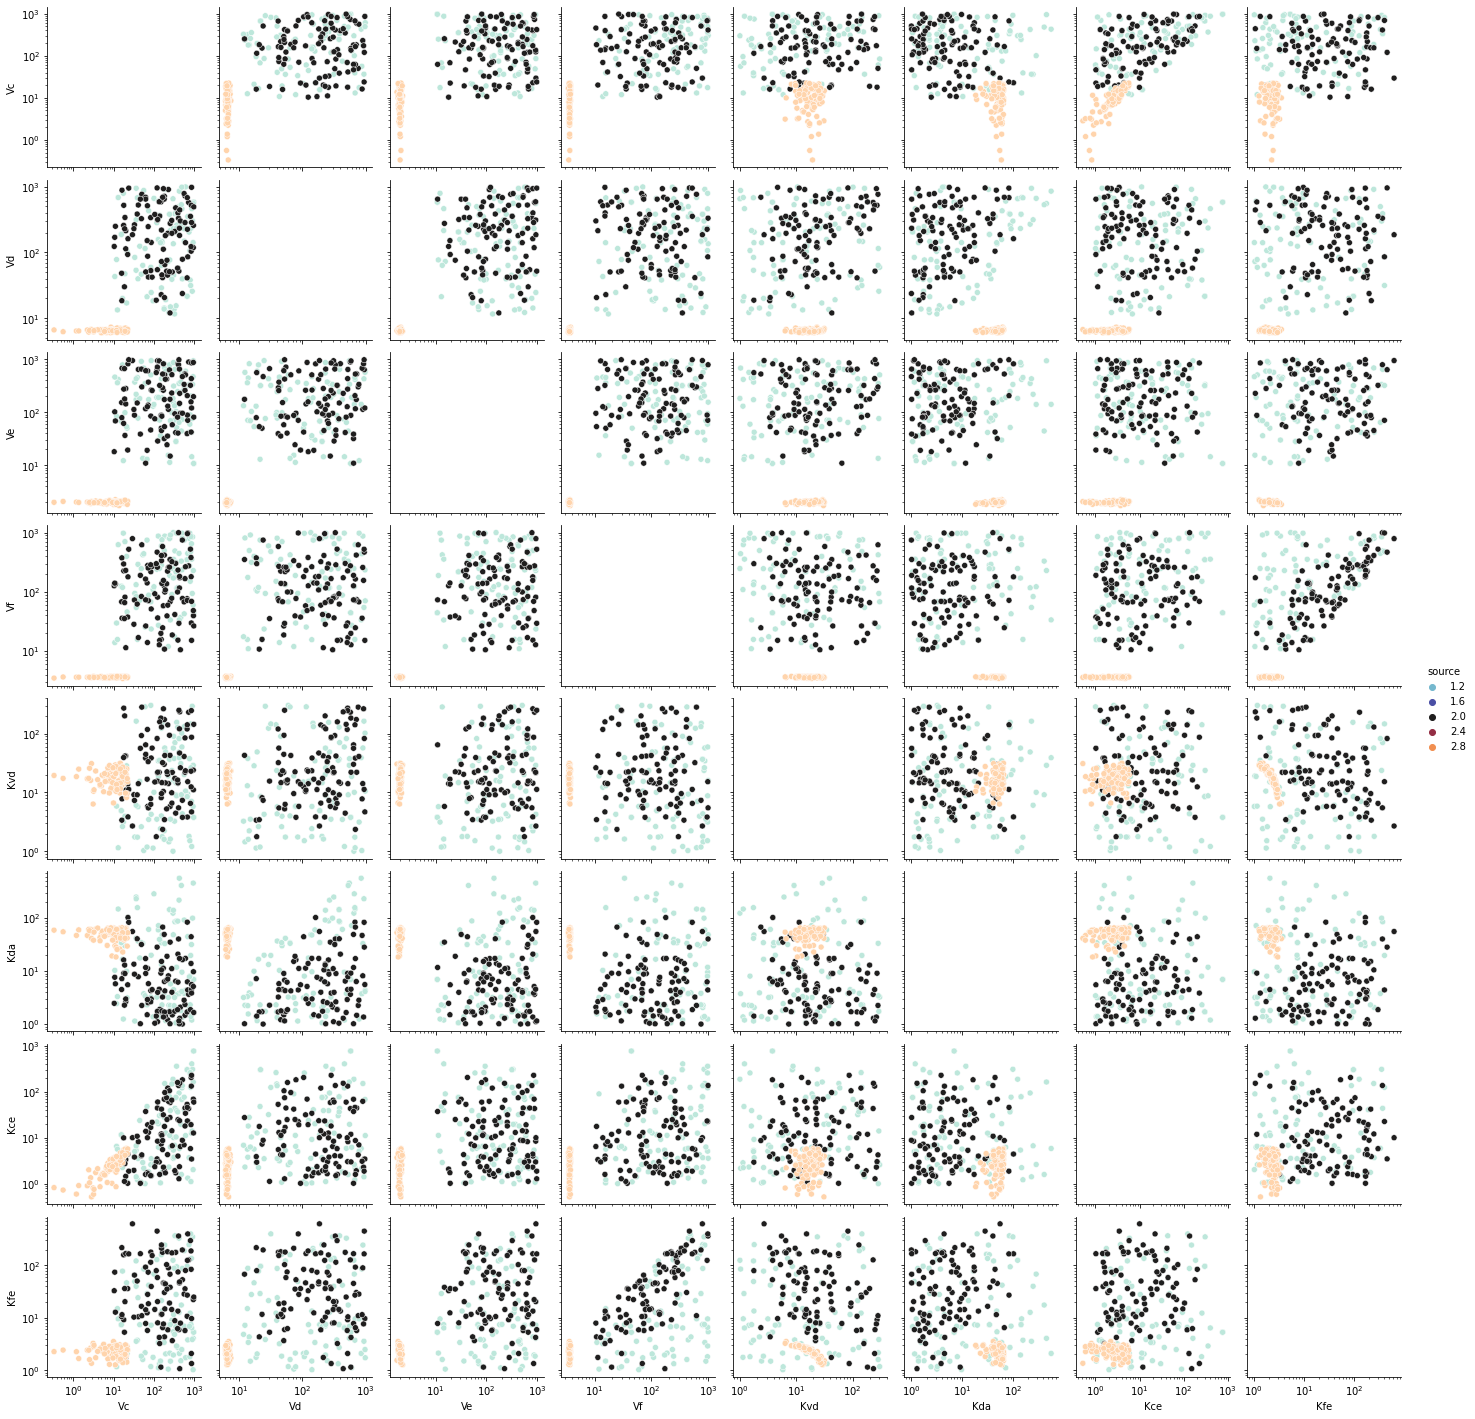

In [9]:
balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
fit_df = fit_df[paramList]
balanced_lsa_df_drop = balanced_lsa_df.droplevel(level=1)
# balanced_lsa_df_drop = balanced_lsa_df_drop.reset_index(inplace=True, drop=True)
instabilities_df_drop = instabilities_df.droplevel(level=1)
# instabilities_df_drop = instabilities_df_drop.reset_index(inplace=True, drop=True)
fit_df_drop = fit_df.reset_index()
crop=100
sourcelist = np.concatenate((np.random.normal(loc=1,size=crop,scale=0.0001), np.random.normal(loc=2,size=crop,scale=0.0001), np.random.normal(loc=3,size=crop,scale=0.0001)))
# sourcelist = np.concatenate(([1]*crop, [2]*crop ,[3]*crop))



concat_df = pd.concat([balanced_lsa_df_drop.iloc[:crop], instabilities_df_drop.iloc[:crop],fit_df[:crop]], ignore_index=True, axis=0)
concat_df['source'] = sourcelist
concat_df
pairplot = sns.pairplot(concat_df, hue='source', palette="icefire")
for ax in pairplot.axes.flat:
    ax.set(xscale="log")
    ax.set(yscale="log")
# sns.pairplot(data=concat_df, hue='source', palette="Paired")
plt.show()

/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_8048/1200249021.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_8048/1200249021.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.githu

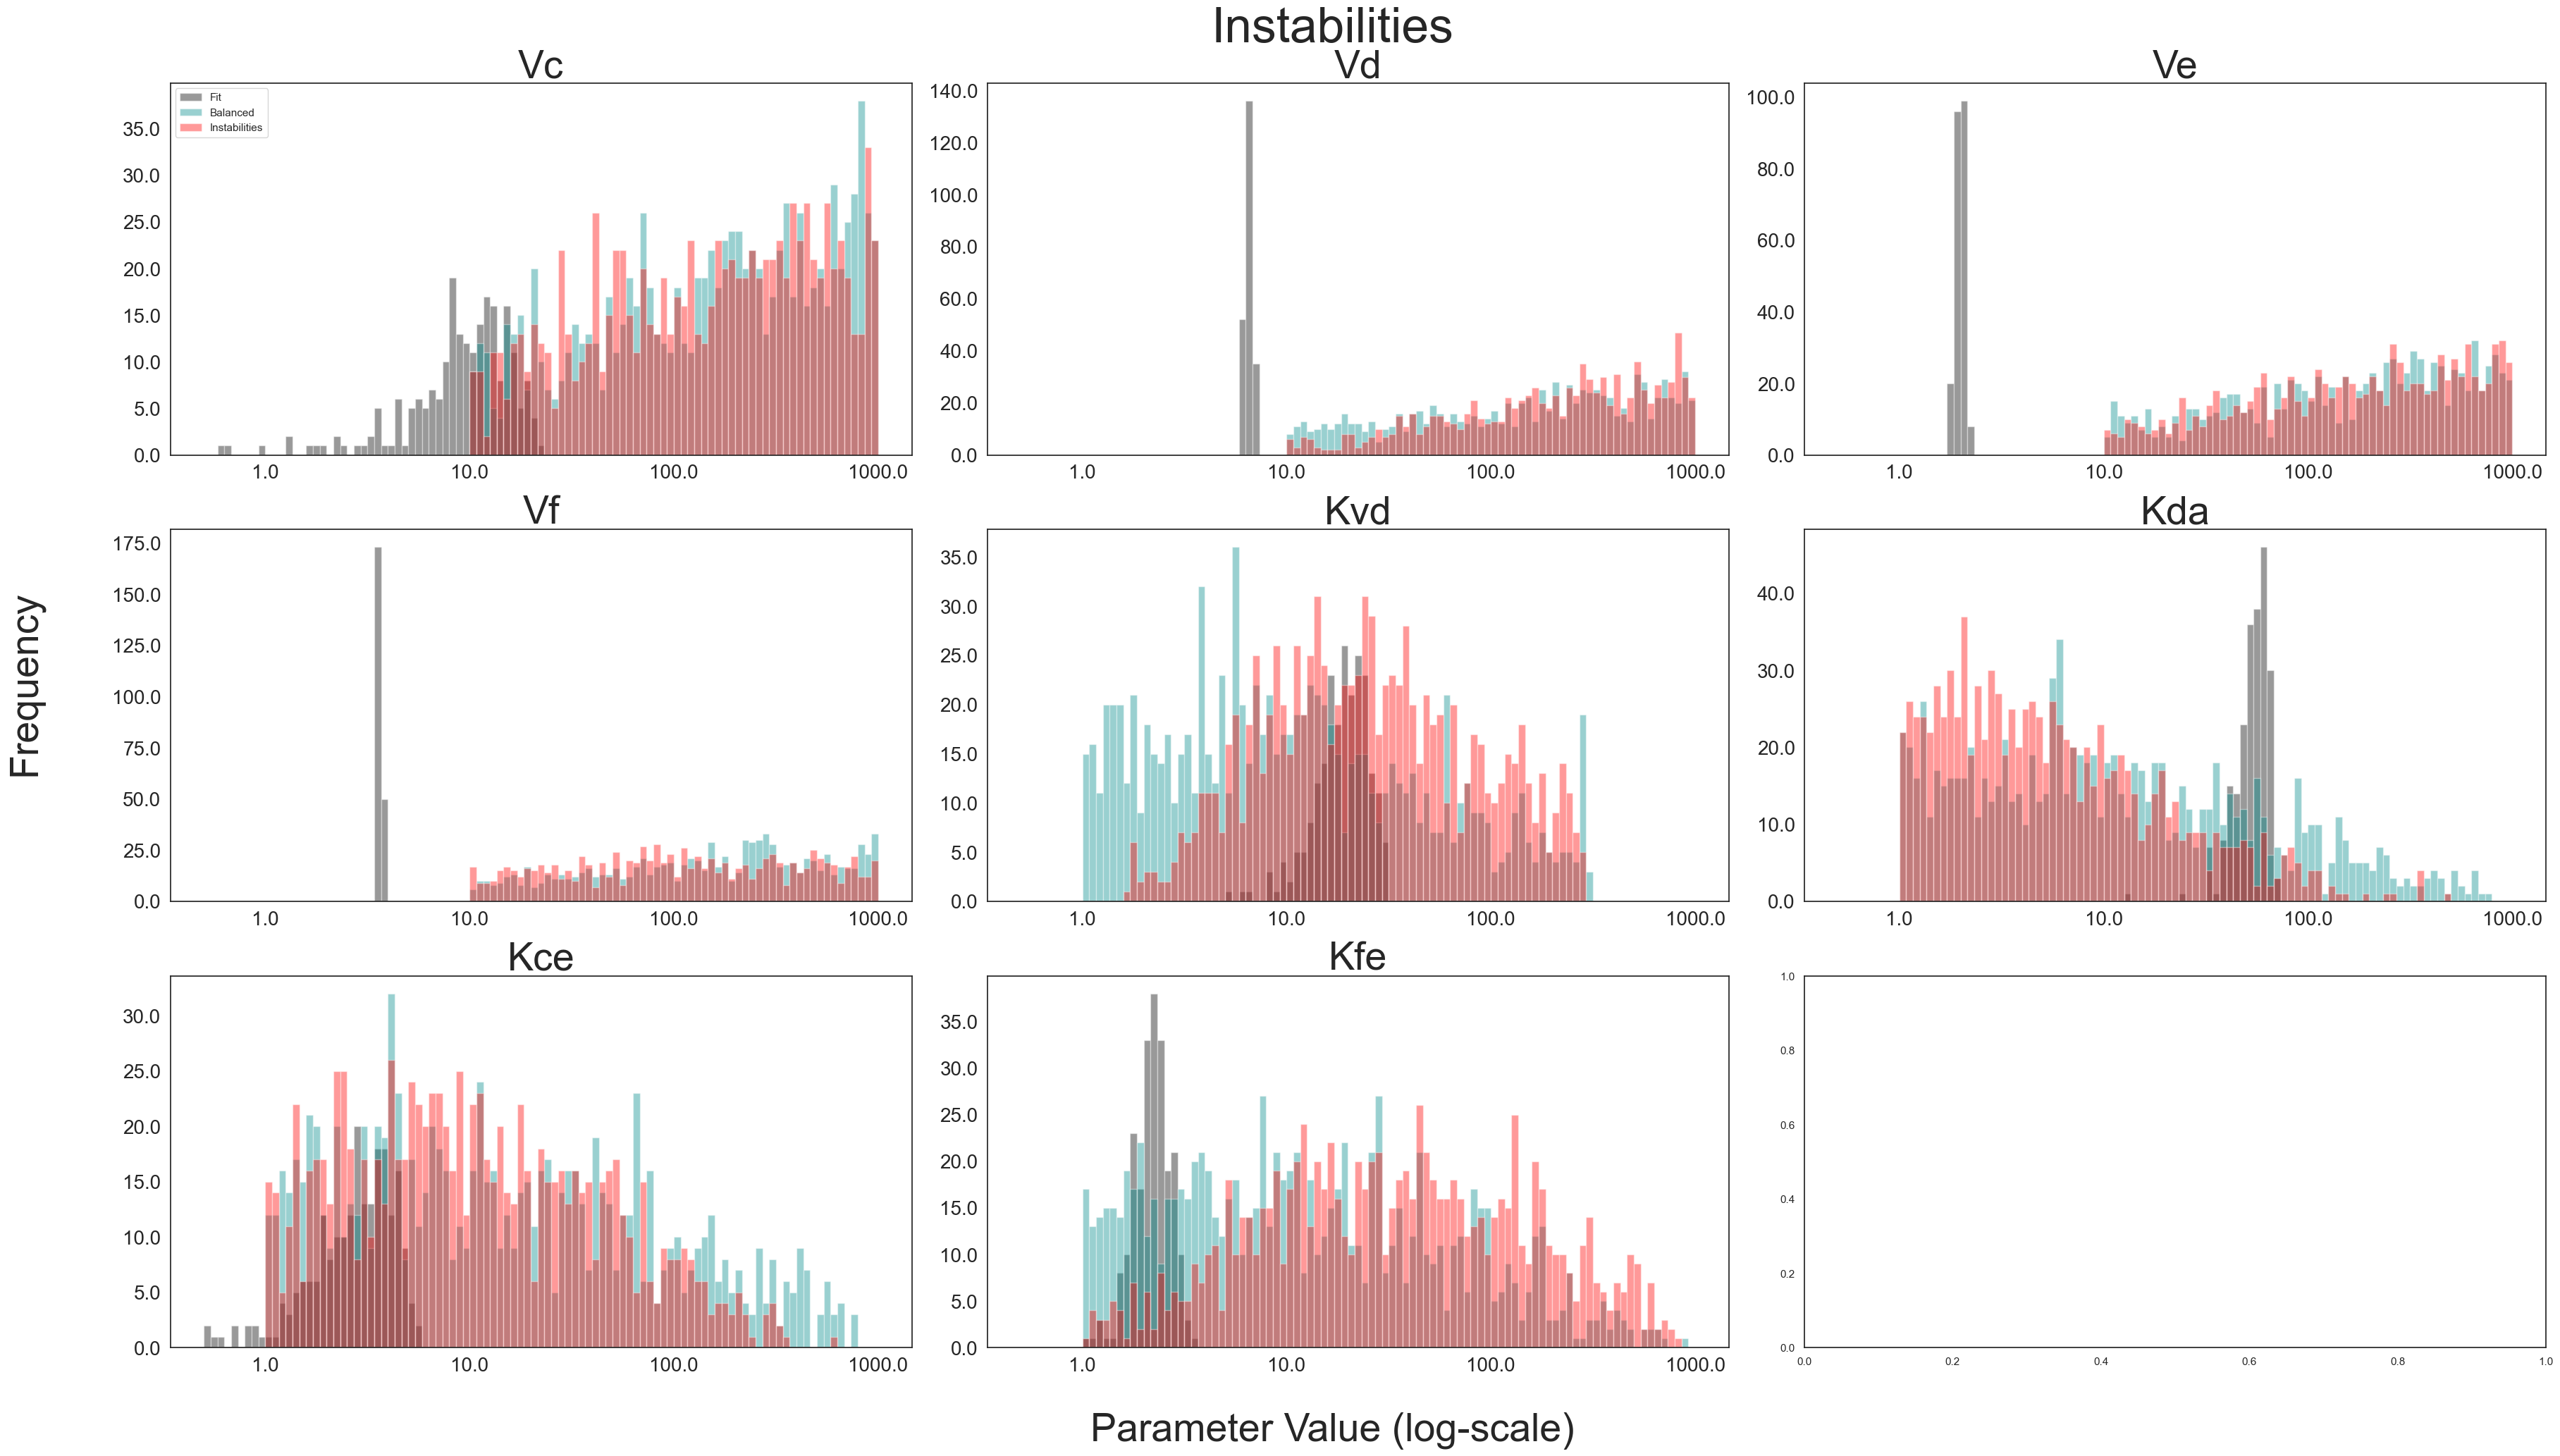

In [13]:
from scipy import stats
def paramsHistogram(balancedDf,specificDf,fitDf,title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(35,20))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([balancedDf,specificDf,fitDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        q = df_concat[parameter].quantile(0.3)
        df_concat[df_concat[parameter] < q]
        LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        # newBins = np.logspace(LogMin/10, LogMax,100)
        newBins = np.logspace(-0.3,3,100)
        sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
        sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count], label=title)
        # sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)

        axs[count].set_title(str(parameter),fontsize=40)
        axs[0].legend()
    
    fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
    plt.show()


balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
turing_df = turing_df[paramList]
fit_df= fit_df[paramList]

paramsHistogram(balanced_lsa_df,instabilities_df,fit_df, 'Instabilities',crop=1000)



In [6]:
balanced_lsa_df_drop = balanced_lsa_df.droplevel(level=1)
instabilities_df_drop = instabilities_df.droplevel(level=1)

balanced_lsa_df_drop['source'] = 1
instabilities_df_drop['source'] = 2

/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:453: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges[:-1], name="edges"),
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:454: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(np.diff(edges) * shrink, name="widths"),
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:453: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges[:-1], name="edges"),
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distribution

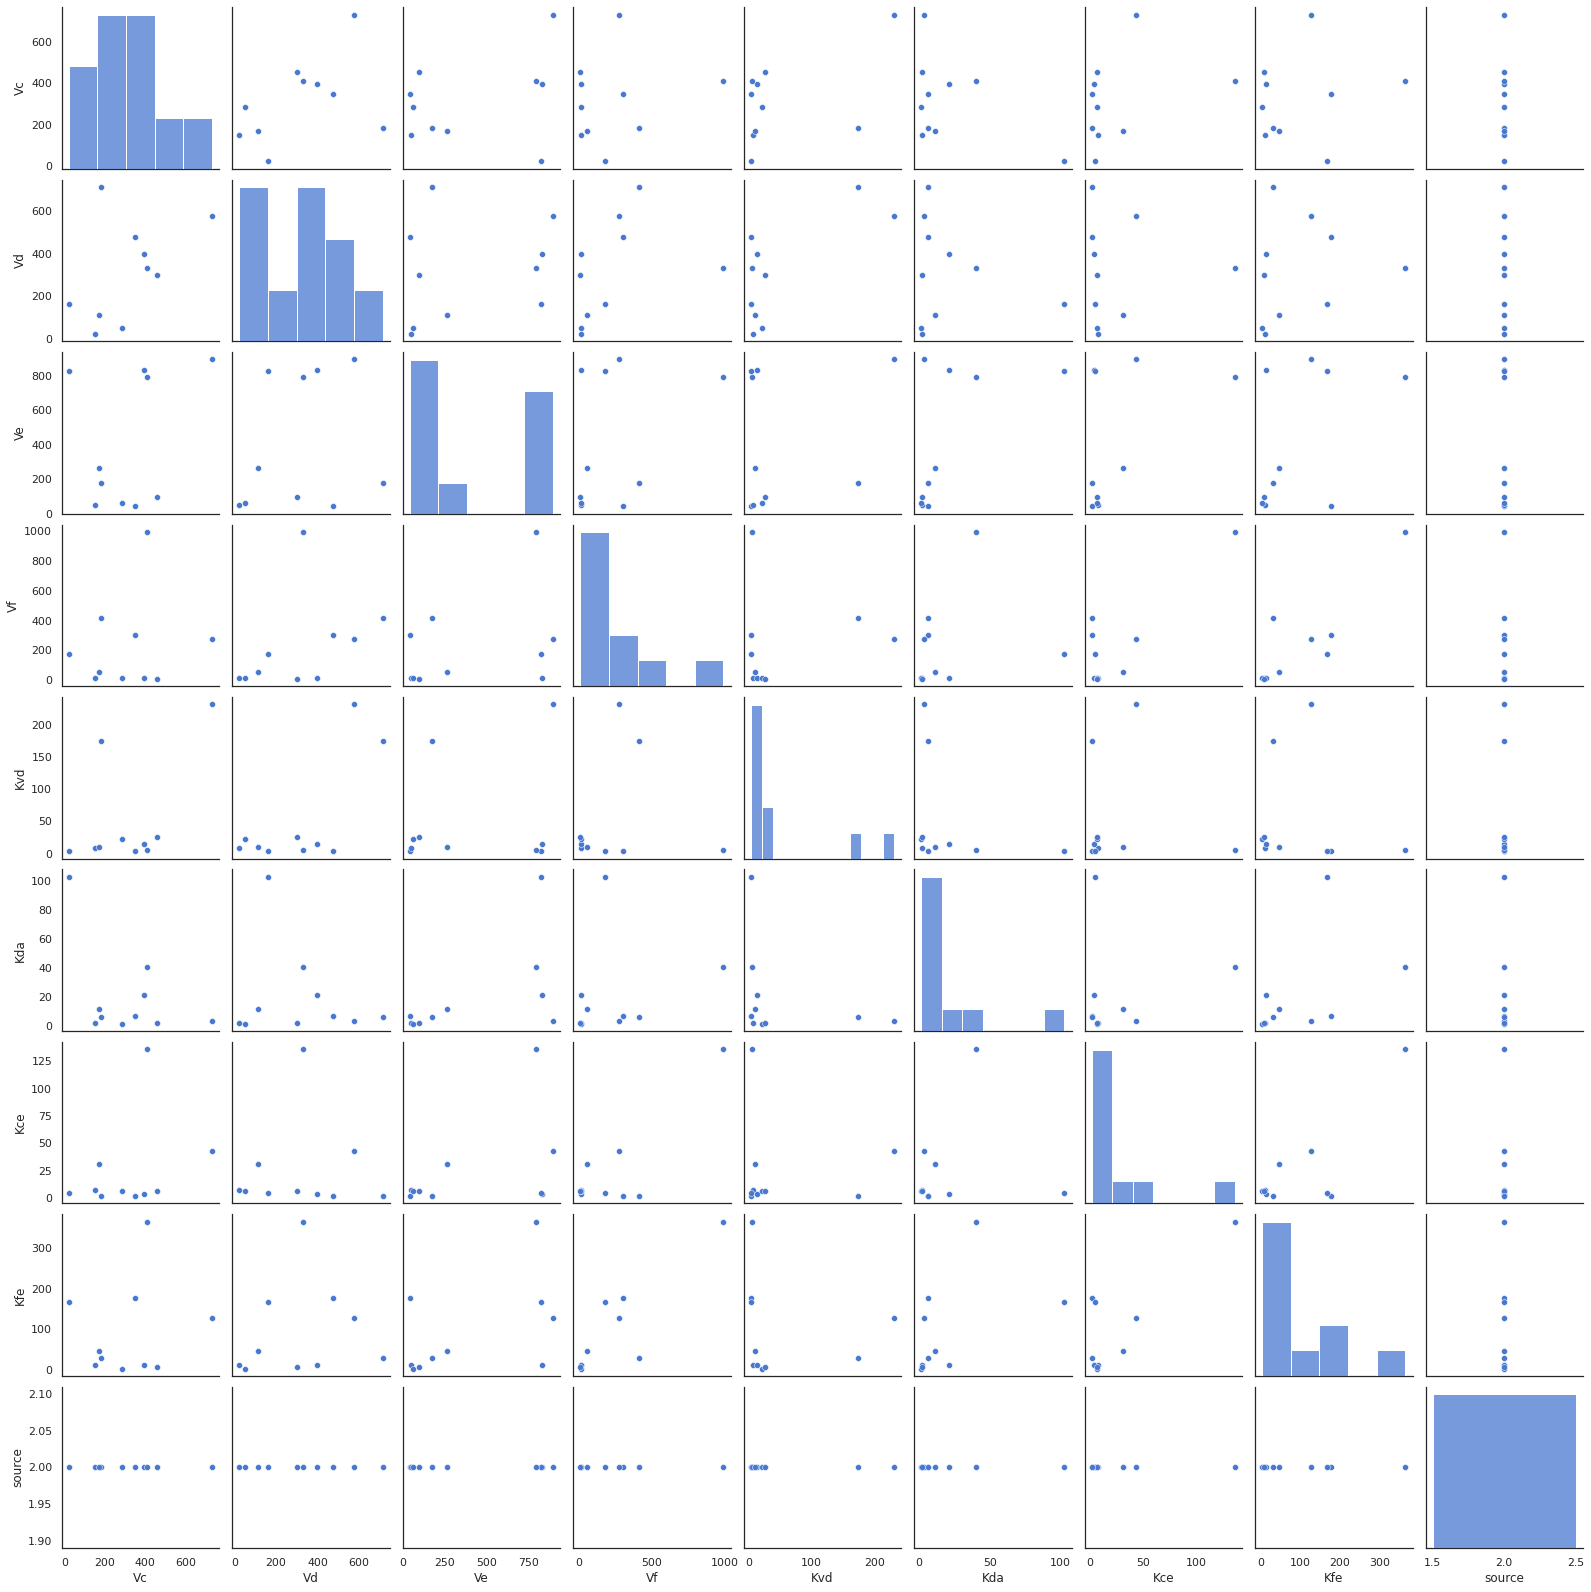

In [11]:
sns.pairplot(data =instabilities_df_drop.iloc[:10])
plt.show()

/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

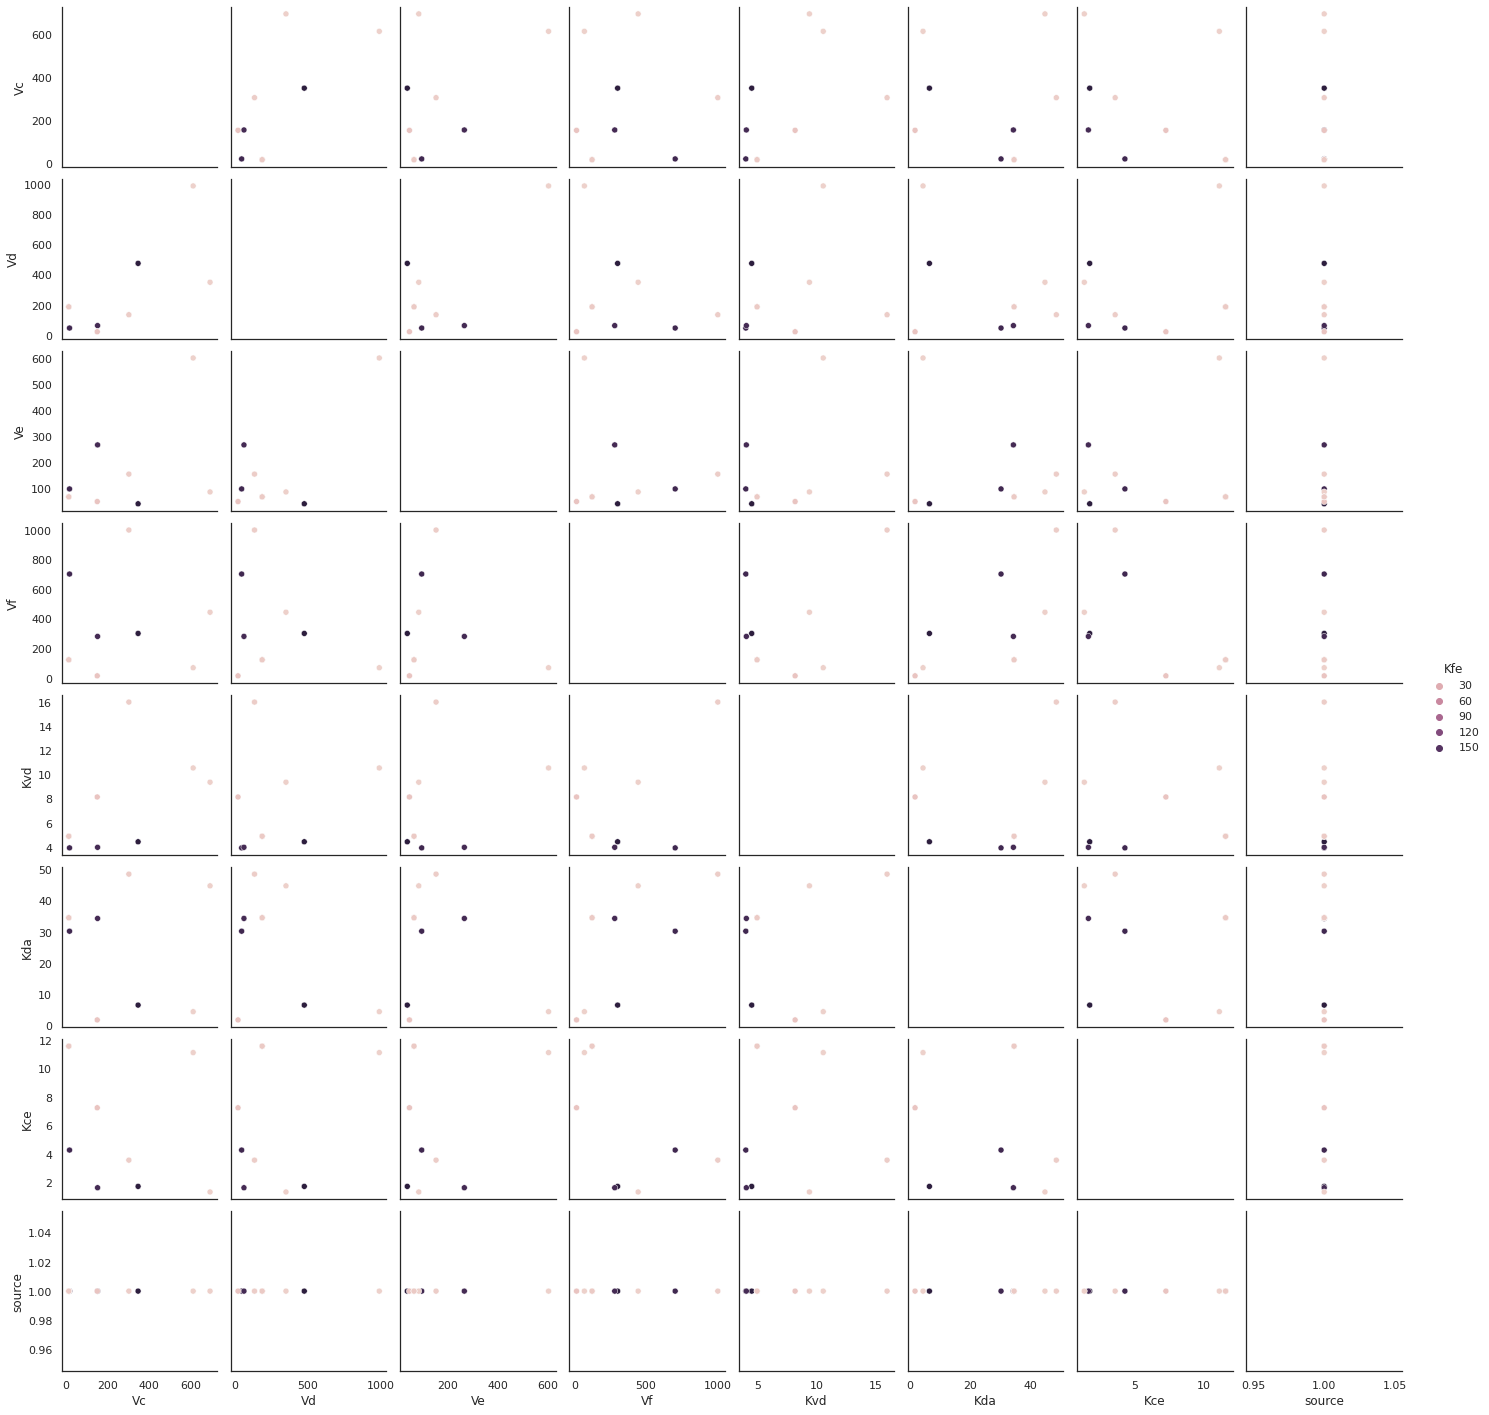

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


import pandas as pd
# del concatenated_df

# def concatenate_dataframes(df1, df2, df3,crop=100):
def concatenate_dataframes(df1, df2,crop=100):
    # Create a new column in each data frame to specify the original source
    df1['source'] =  1
    df2['source'] = 2
    # df3['a'] = "blue"
    concat_df = pd.concat([df1, df2], ignore_index=True)
    concat_df['source'] =  concat_df['source'].astype(int)
    # Concatenate the data frames vertically
    # concatenated_df = pd.concat([df1.iloc[:crop], df2.iloc[:crop], df3.iloc[:crop]], ignore_index=True)
    return concat_df



# concatenated_df = concatenate_dataframes(balanced_lsa_df, instabilities_df, turing_df, crop=5)
concat_df = concatenate_dataframes(balanced_lsa_df_drop, instabilities_df_drop, crop=5)
# concatenated_df

# Create the pairplot with hue and store the AxesSubplot object
# sns.pairplot(concat_df)
# fig, ax = plt.subplots(figsize=(10, 10))
# balanced_lsa_df_drop['sources']='a'
sns.pairplot(data=balanced_lsa_df_drop.iloc[:10], hue='Kfe')

# Create a second pairplot with a different color palette and overlay it on the first plot
# sns.scatterplot(data=balanced_lsa_df_drop.iloc[:10], palette='Set2',ax=ax)
# # Apply logarithmic scale to the axes
# plot.set(xscale="log", yscale="log")
# g1.fig.suptitle('Pairplot Overlay')

# Adjust the spacing between subplots
# plt.subplots_adjust(top=0.9)

# Display the plot
# plt.show()
# # Display the plot
# plt.show()
plt.show()

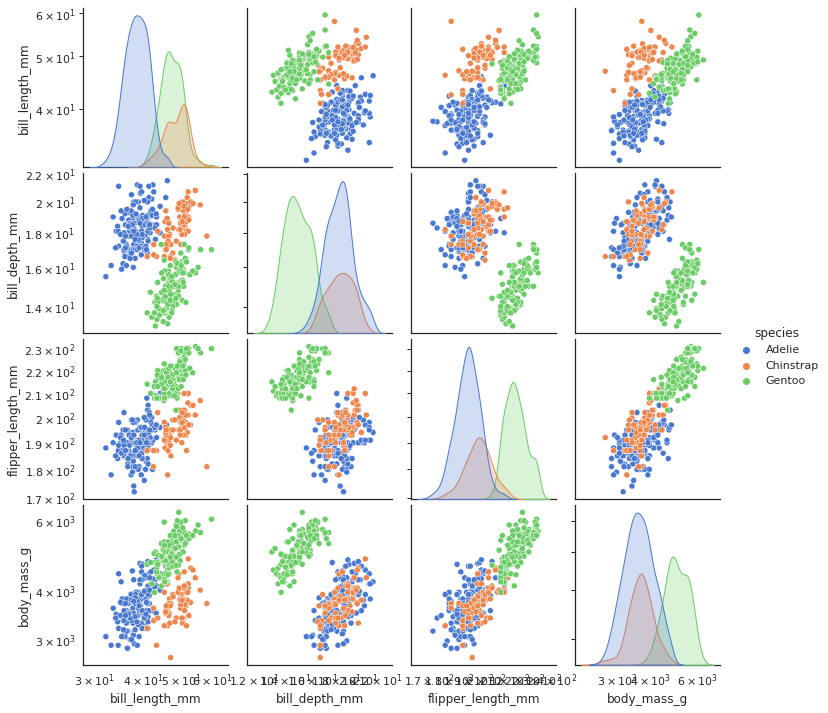

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Create the pairplot with hue and store the AxesSubplot object
plot = sns.pairplot(penguins, hue="species")

# Apply logarithmic scale to the axes
plot.set(xscale="log", yscale="log")

# Display the plot
plt.show()

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
